# 🔄 Quy trình làm việc cơ bản với các mô hình GitHub (Python)

## 📋 Hướng dẫn điều phối quy trình làm việc

Notebook này giới thiệu khả năng mạnh mẽ của **Workflow Builder** trong Microsoft Agent Framework. Học cách tạo các quy trình làm việc đa bước phức tạp, có thể xử lý các quy trình kinh doanh phức tạp và phối hợp nhiều hoạt động AI một cách liền mạch.

## 🎯 Mục tiêu học tập

### 🏗️ **Kiến trúc quy trình làm việc**
- **Workflow Builder**: Thiết kế và điều phối các quy trình đa bước phức tạp
- **Thực thi dựa trên sự kiện**: Xử lý các sự kiện và chuyển đổi trạng thái trong quy trình làm việc
- **Thiết kế quy trình trực quan**: Tạo và hình dung cấu trúc quy trình làm việc
- **Tích hợp mô hình GitHub**: Tận dụng các mô hình AI trong ngữ cảnh quy trình làm việc

### 🔄 **Điều phối quy trình**
- **Hoạt động tuần tự**: Kết nối nhiều nhiệm vụ của agent theo thứ tự logic
- **Logic điều kiện**: Triển khai các điểm quyết định và quy trình làm việc phân nhánh
- **Xử lý lỗi**: Khôi phục lỗi mạnh mẽ và đảm bảo độ bền của quy trình làm việc
- **Quản lý trạng thái**: Theo dõi và quản lý trạng thái thực thi quy trình làm việc

### 📊 **Mẫu quy trình làm việc doanh nghiệp**
- **Tự động hóa quy trình kinh doanh**: Tự động hóa các quy trình tổ chức phức tạp
- **Phối hợp nhiều agent**: Phối hợp nhiều agent chuyên biệt
- **Thực thi quy mô lớn**: Thiết kế quy trình làm việc cho các hoạt động quy mô doanh nghiệp
- **Giám sát & quan sát**: Theo dõi hiệu suất và kết quả của quy trình làm việc

## ⚙️ Yêu cầu & thiết lập

### 📦 **Các phụ thuộc cần thiết**

Cài đặt Agent Framework với khả năng quy trình làm việc:

```bash
pip install agent-framework-core -U
```

### 🔑 **Cấu hình mô hình GitHub**

**Thiết lập môi trường (tệp .env):**
```env
GITHUB_TOKEN=your_github_personal_access_token
GITHUB_ENDPOINT=https://models.inference.ai.azure.com
GITHUB_MODEL_ID=gpt-4o-mini
```

### 🏢 **Các trường hợp sử dụng doanh nghiệp**

**Ví dụ về quy trình kinh doanh:**
- **Khởi tạo khách hàng**: Quy trình xác minh và thiết lập đa bước
- **Chuỗi nội dung**: Tự động hóa tạo nội dung, đánh giá và xuất bản
- **Xử lý dữ liệu**: Quy trình ETL với chuyển đổi hỗ trợ AI
- **Đảm bảo chất lượng**: Kiểm tra và xác thực tự động

**Lợi ích của quy trình làm việc:**
- 🎯 **Độ tin cậy**: Thực thi xác định với khả năng khôi phục lỗi
- 📈 **Khả năng mở rộng**: Xử lý tự động hóa quy trình với khối lượng lớn
- 🔍 **Khả năng quan sát**: Theo dõi đầy đủ và giám sát
- 🔧 **Khả năng bảo trì**: Thiết kế trực quan và các thành phần mô-đun

## 🎨 Mẫu thiết kế quy trình làm việc

### Cấu trúc quy trình làm việc cơ bản
```mermaid
graph TD
    A[Start] --> B[Agent Task 1]
    B --> C{Decision Point}
    C -->|Success| D[Agent Task 2]
    C -->|Failure| E[Error Handler]
    D --> F[End]
    E --> F
```

**Các thành phần chính:**
- **WorkflowBuilder**: Động cơ điều phối chính
- **WorkflowEvent**: Xử lý sự kiện và giao tiếp
- **WorkflowViz**: Đại diện trực quan và gỡ lỗi quy trình làm việc

Hãy bắt đầu xây dựng quy trình làm việc thông minh đầu tiên của bạn! 🚀


In [1]:
! pip install agent-framework-core -U

In [2]:
# 🔄 Import Workflow and Agent Framework Components
# Core components for building sophisticated agent workflows

from agent_framework.openai import OpenAIChatClient    # 🤖 GitHub Models client integration
from agent_framework import WorkflowBuilder, WorkflowEvent, WorkflowViz  # 🏗️ Workflow orchestration tools

In [3]:
# 📦 Import Environment and System Utilities
# Essential libraries for configuration and environment management

import os                      # 🔧 Environment variable access
from dotenv import load_dotenv # 📁 Secure configuration loading

In [4]:
# 🔧 Initialize Environment Configuration
# Load GitHub Models API credentials from .env file
load_dotenv()

True

In [5]:
# 🔗 Initialize GitHub Models Chat Client for Workflow Operations
# Create the AI client that will power agents within our workflow
chat_client = OpenAIChatClient(
    base_url=os.environ.get("GITHUB_ENDPOINT"),    # 🌐 GitHub Models API endpoint
    api_key=os.environ.get("GITHUB_TOKEN"),        # 🔑 Authentication token
    model_id=os.environ.get("GITHUB_MODEL_ID")  # 🎯 Selected AI model
)

In [6]:
REVIEWER_NAME = "Concierge"
REVIEWER_INSTRUCTIONS = """
    You are an are hotel concierge who has opinions about providing the most local and authentic experiences for travelers.
    The goal is to determine if the front desk travel agent has recommended the best non-touristy experience for a traveler.
    If so, state that it is approved.
    If not, provide insight on how to refine the recommendation without using a specific example. 
    """

In [7]:
FRONTDESK_NAME = "FrontDesk"
FRONTDESK_INSTRUCTIONS = """
    You are a Front Desk Travel Agent with ten years of experience and are known for brevity as you deal with many customers.
    The goal is to provide the best activities and locations for a traveler to visit.
    Only provide a single recommendation per response.
    You're laser focused on the goal at hand.
    Don't waste time with chit chat.
    Consider suggestions when refining an idea.
    """

In [8]:
reviewer_agent   = chat_client.create_agent(
        instructions=(
           REVIEWER_INSTRUCTIONS
        ),
        name=REVIEWER_NAME,
    )

front_desk_agent = chat_client.create_agent(
        instructions=(
            FRONTDESK_INSTRUCTIONS
        ),
        name=FRONTDESK_NAME,
    )

In [9]:
workflow = WorkflowBuilder().set_start_executor(front_desk_agent).add_edge(front_desk_agent, reviewer_agent).build()

In [10]:

print("Generating workflow visualization...")
viz = WorkflowViz(workflow)
# Print out the mermaid string.
print("Mermaid string: \n=======")
print(viz.to_mermaid())
print("=======")
# Print out the DiGraph string.
print("DiGraph string: \n=======")
print(viz.to_digraph())
print("=======")
svg_file = viz.export(format="svg")
print(f"SVG file saved to: {svg_file}")

Generating workflow visualization...
Mermaid string: 
flowchart TD
  FrontDesk["FrontDesk (Start)"];
  Concierge["Concierge"];
  FrontDesk --> Concierge;
DiGraph string: 
digraph Workflow {
  rankdir=TD;
  node [shape=box, style=filled, fillcolor=lightblue];
  edge [color=black, arrowhead=vee];

  "FrontDesk" [fillcolor=lightgreen, label="FrontDesk\n(Start)"];
  "Concierge" [label="Concierge"];
  "FrontDesk" -> "Concierge";
}
SVG file saved to: C:\Users\kinfeylo\AppData\Local\Temp\tmpq947fo_v.svg


In [11]:
class DatabaseEvent(WorkflowEvent): ...

Attempting to display SVG file at: C:\Users\kinfeylo\AppData\Local\Temp\tmpq947fo_v.svg


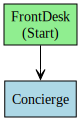

In [12]:
# Display the exported workflow SVG inline in the notebook

from IPython.display import SVG, display, HTML
import os

print(f"Attempting to display SVG file at: {svg_file}")

if svg_file and os.path.exists(svg_file):
    try:
        # Preferred: direct SVG rendering
        display(SVG(filename=svg_file))
    except Exception as e:
        print(f"⚠️ Direct SVG render failed: {e}. Falling back to raw HTML.")
        try:
            with open(svg_file, "r", encoding="utf-8") as f:
                svg_text = f.read()
            display(HTML(svg_text))
        except Exception as inner:
            print(f"❌ Fallback HTML render also failed: {inner}")
else:
    print("❌ SVG file not found. Ensure viz.export(format='svg') ran successfully.")


In [13]:
result =''
async for event in workflow.run_stream('I would like to go to Paris.'):
    if isinstance(event, DatabaseEvent):
        print(f"{event}")
    if isinstance(event, WorkflowEvent):
        result += str(event.data)
        # print(f"Workflow output: {event.data}")

In [14]:
result.replace("None", "")

'Visit the Louvre Museum for world-class art and historical masterpieces.While the Louvre is certainly an iconic destination, it can be quite touristy. To enhance the authenticity of your experience in Paris, consider recommending a lesser-known art space or gallery where you can appreciate local artists and their work. Additionally, exploring lesser-trodden neighborhoods or engaging with local artisans can provide a more genuine feel of Parisian culture. Aim for experiences that allow for personal interactions and deeper connections with the local community.While the Louvre is certainly an iconic destination, it can be quite touristy. To enhance the authenticity of your experience in Paris, consider recommending a lesser-known art space or gallery where you can appreciate local artists and their work. Additionally, exploring lesser-trodden neighborhoods or engaging with local artisans can provide a more genuine feel of Parisian culture. Aim for experiences that allow for personal inte


---

**Tuyên bố miễn trừ trách nhiệm**:  
Tài liệu này đã được dịch bằng dịch vụ dịch thuật AI [Co-op Translator](https://github.com/Azure/co-op-translator). Mặc dù chúng tôi cố gắng đảm bảo độ chính xác, xin lưu ý rằng các bản dịch tự động có thể chứa lỗi hoặc không chính xác. Tài liệu gốc bằng ngôn ngữ bản địa nên được coi là nguồn thông tin chính thức. Đối với các thông tin quan trọng, khuyến nghị sử dụng dịch vụ dịch thuật chuyên nghiệp bởi con người. Chúng tôi không chịu trách nhiệm cho bất kỳ sự hiểu lầm hoặc diễn giải sai nào phát sinh từ việc sử dụng bản dịch này.
